In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

      Latitude   Longitude Request Date  Days Between Requests
0    43.199150  150.827586   2022-04-15                      1
1    52.951336 -114.673991   2022-03-05                      3
2    21.528403  -80.666652   2022-01-04                      2
3     3.594849 -107.295417   2022-12-10                      8
4    68.542979 -137.791636   2022-08-04                      3
..         ...         ...          ...                    ...
995  35.945050   89.003167   2022-11-19                      1
996 -19.528862  167.496938   2022-05-30                      7
997  64.429800  -72.770825   2022-01-26                      4
998  -8.836256 -150.478347   2022-10-10                      9
999  56.541949    9.014297   2022-08-24                      2

[1000 rows x 4 columns]
      Latitude   Longitude Request Date  Days Between Requests
0    43.199150  150.827586   2022-04-15                      1
1    52.951336 -114.673991   2022-03-05                      3
2    21.528403  -80.666652   2

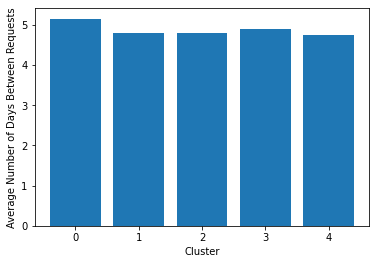

In [32]:

# Load the request data into a Pandas dataframe
request_data = pd.read_csv("request_data.csv")

# Convert the Request Date column to datetime format
request_data["Request Date"] = pd.to_datetime(request_data["Request Date"])

print(request_data)

# Fill the first entry with the average value (to avoid NaN)
request_data["Days Between Requests"].fillna(request_data["Days Between Requests"].mean(), inplace=True)

print(request_data)

# Extract the location data
locations = request_data[["Latitude", "Longitude"]].values

# Fit the KMeans model to the location data
kmeans = KMeans(n_clusters=5, random_state=0).fit(locations)

# Predict the cluster for each location
request_data["Cluster"] = kmeans.predict(locations)

# Calculate the average number of days between requests for each cluster
cluster_averages = request_data.groupby("Cluster").mean()["Days Between Requests"]

# Plot the number of days between requests for each cluster
plt.bar(cluster_averages.index, cluster_averages.values)
plt.xlabel("Cluster")
plt.ylabel("Average Number of Days Between Requests")
plt.show()


In [33]:
import pickle
# Save the model
filename = 'days_between_requests_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

In [34]:
with open("cluster_averages.pkl", "wb") as f:
    pickle.dump(cluster_averages, f)

In [35]:
cluster_averages

Cluster
0    5.145946
1    4.798283
2    4.794393
3    4.896373
4    4.742857
Name: Days Between Requests, dtype: float64